# Section 1

## Accuracy of the Hamming Decoder

The accuracy is defined as:
$$
accuracy = P(decode\_hamming(r, m) = s) \quad \text{where} \quad r = n + s \mod 2
$$
- r: received codeword after passing through the channel
- n: transmitted codeword
- s: noise

### Derivation
- r has a probability p of each bit being flipped.
- `decode-hamming` only returns the correct codeword if 0 or 1 bits are flipped.
- For m parity bits, the encoded codeword has length $n = 2^m - 1$.

- The number of flipped bits in the encoded codeword can be represented as a **binomial random variable**:
$$
F \sim B(n, p)
$$

- The probability of correct decoding is:
$$
P(decode\_hamming(r, m) = s) = P(F \leq 1) = \binom{n}{0} p^0 (1-p)^n + \binom{n}{1} p^1 (1-p)^{n-1} = (1-p)^n + np(1-p)^{1-n}
$$

### For p = 0.5:
$$
P(F \leq 1) = \left(\frac{1}{2}\right)^n + \frac{n}{2} \left(1 - \frac{1}{2}\right)^{n-1} = \left(\frac{1}{2}\right)^n (1 + n)
$$

- Substituting $n = 2^m - 1$:
$$
 = \frac{2^m - n + 1}{2^n} = \frac{2^{m-n}}{2^n} = 2^{-k}
$$
where: $k = 2^m - 1 - m$

1. For $m = 2: \quad$  $n = 3$, $k = 1$, $accuracy = 2^{-1} = 0.5$

2. For $m = 3: \quad$  $n = 7$, $k = 4$, $accuracy = 2^{-4} = 0.0625$

3. For $m = 4: \quad$  $n = 15$, $k = 11$, $accuracy = 2^{-11} \approx 0.000488$


In [37]:
import coursework as cw
import matplotlib.pyplot as plt
from tqdm import trange
from importlib import reload
import random
import numpy as np

In [17]:
reload(cw)
p=0.5
n=100
ms = [2, 3, 4]

def simulate_accuracy(m, n=n, p=p):
    total = 0
    ret = []
    for i in trange(n):
        total += cw.decoder_accuracy(m=m, p=p)
        ret.append(total / (i+1))
    return ret

average_over_100_iterations = [simulate_accuracy(m=m) for i, m in enumerate(ms)]

100%|██████████| 100/100 [00:40<00:00,  2.49it/s]


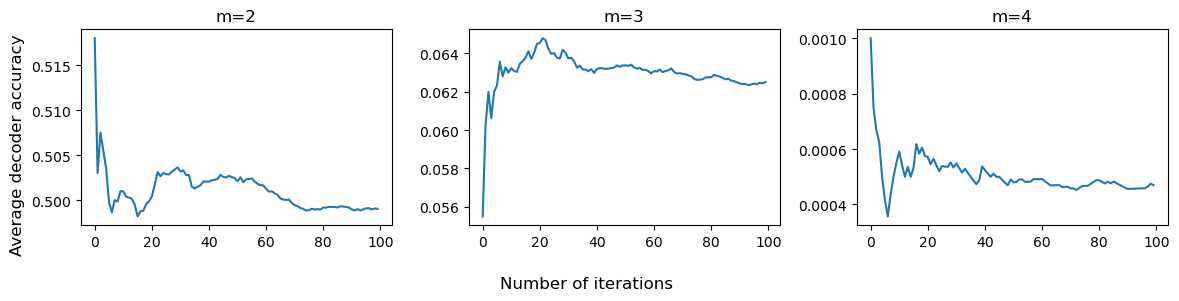

In [62]:
fig, ax = plt.subplots(ncols=3, figsize=(12, 3))
xs = [x for x in range(n)]
for i, a in enumerate(average_over_100_iterations):
    ax[i].plot(xs, a)
    ax[i].title.set_text(f'm={i+2}')

fig.supxlabel("Number of iterations")
fig.supylabel("Average decoder accuracy")
plt.tight_layout()
plt.show()

As we can see, over 100 simulations, the average accuracy converges to the expected value of $2^{-k}$. For $m=[2, 3, 4]$, convergence to $[0.5, 0.625, 0.00048]$ respectively.

# Section 2

## Relationship between Accuracy, Bitflip probability (p) and No. of parity bits (m)

In [31]:
def accuracy_vs_p(m, n_samples=100, p_max=0.5):
    scatter_points = []
    for i in trange(n_samples):
        p_sample = random.random() * p_max
        scatter_points.append([p_sample, cw.decoder_accuracy(m, p_sample)])
    return scatter_points

scatter_points_per_m = [accuracy_vs_p(m) for m in ms]

100%|██████████| 100/100 [00:34<00:00,  2.86it/s]


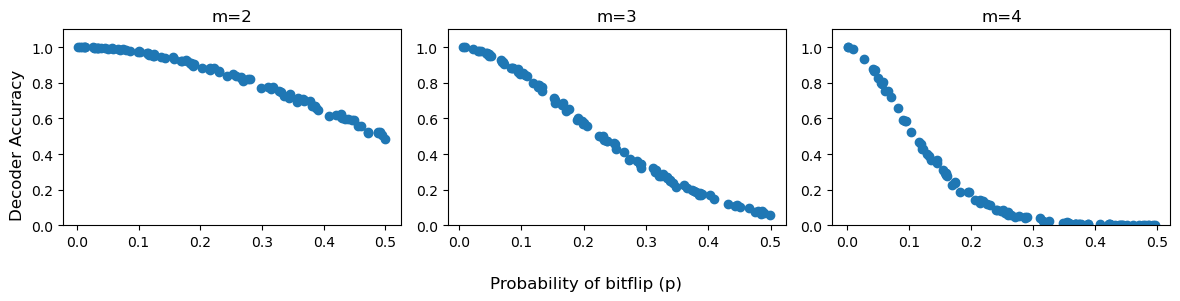

In [64]:
fig, ax = plt.subplots(ncols=3, figsize=(12, 3))
xs = [x for x in range(n)]
for i, points in enumerate(scatter_points_per_m):
    p = np.array(points)
    px, py = p[:, 0], p[:, 1]
    ax[i].scatter(px, py)
    ax[i].title.set_text(f'm={i+2}')
    ax[i].set_ylim([0, 1.1])

fig.supxlabel("Probability of bitflip (p)")
fig.supylabel("Decoder Accuracy")
plt.tight_layout()
plt.show()

Generally p and decoding accuracy are negatively correlated for all m.

For $m=2$, accuracy is always above 0.5 and is close to perfect for $p<0.15$. However, for $m=3$, accuracy is poor for $p>0.2$ and only relatively good for $p<0.05$. Finally for $m=4$ accuracy is only good for close to $p=0$, poor for $p>0.1$ and close to impossible for $p>0.25$.

Whilst accuracy is good for $m=2$ it is also extremely space inefficient as the length of code we are trying to encrypt triples (2 parity bits for every data bit). However as we try to get more efficient with increasing number of parity bits ($m$), we sacrifice the amount of noise we can handle. We can conclude that hamming codes can only tolerate a small amount of potential noise for most useful applications.